# Text
More text but smaller

# Task 1: Images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import einops
from einops import rearrange, repeat

import math

1) Download the MNIST dataset using the torchvision library and create a subset
of the dataset containing 1,000 samples. Each sample will include a 28 x 28 pixel
image, along with a single integer value denoting the sample's respective class (number).

In [28]:
#download and load data
from torchvision import datasets
mnist = datasets.MNIST('./data', train=True, download=False) #download should be True for first-time download

mnist = mnist._load_data()

In [29]:
#select subset of images and labels
(images, labels) = mnist
print(images.shape, labels.shape)

imgs = images[:1000]
lbls = labels[:1000]

print(imgs.shape, lbls.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([1000, 28, 28]) torch.Size([1000])


2) Plot a histogram of classes in your subset of MNIST.

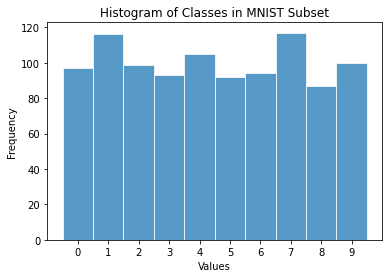

In [30]:
import matplotlib.pyplot as plt

bins=np.arange(11)-0.5
plt.hist(lbls, bins, edgecolor='white', alpha=0.75)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Classes in MNIST Subset')
plt.xticks(range(10))

plt.show()

3) Use the einops python package to batch the subset of MNIST images. Each
batch should contain 25 different samples.

In [31]:
#Batching into 40 sets of 25 images
print(imgs.shape)

batched_imgs = einops.rearrange(imgs, '(n s) h w -> n s 1 h w', s=25)
print(batched_imgs.shape)


torch.Size([1000, 28, 28])
torch.Size([40, 25, 1, 28, 28])


4) Randomly select an MNIST image sample and, using matplotlib, plot it in three
dimensions. The x and y-axis should be the respective pixel locations, and the
z-axis should be the pixel intensity.

Plotting image at idx 7 from batch 17


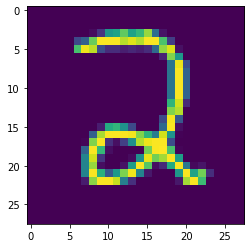

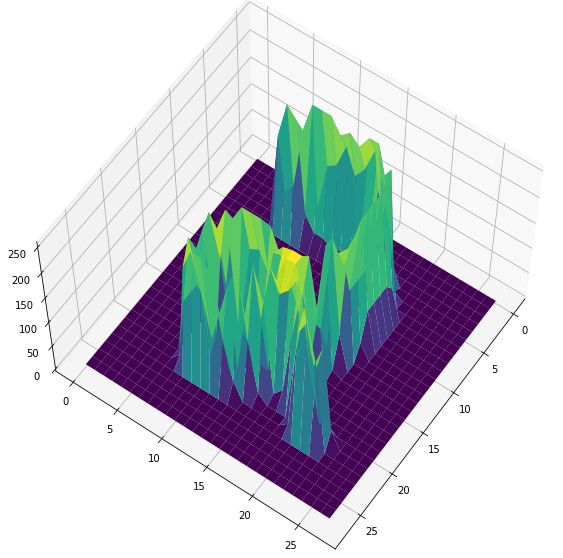

In [32]:
from mpl_toolkits.mplot3d import Axes3D

#select batch & image from batch
bat = np.random.randint(0,len(batched_imgs))
batch = batched_imgs[bat]
idx = np.random.randint(0, len(batch))
img = batch[idx]
print('Plotting image at idx', idx, 'from batch', bat)

#for fun, show 2D image selected
plt.imshow(img[0])
plt.show()

#set up array of the pixel locations
x, y = np.meshgrid(range(28), range(28))

#prepare plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(10,10)

#plot image, x & y reversed to orient correctly
ax.plot_surface(y, x, img[0], cmap='viridis')
ax.view_init(60,35)
plt.show()

# Task 2: Time Series

Load the data

In [3]:
import pandas as pd

df = pd.read_csv(r'data/energydata_complete.csv')

1. Plot the appliances energy consumption for whole period and a closer look at any one week of consumption.